# AST 7939 Week 8

### Deep Neural Networks

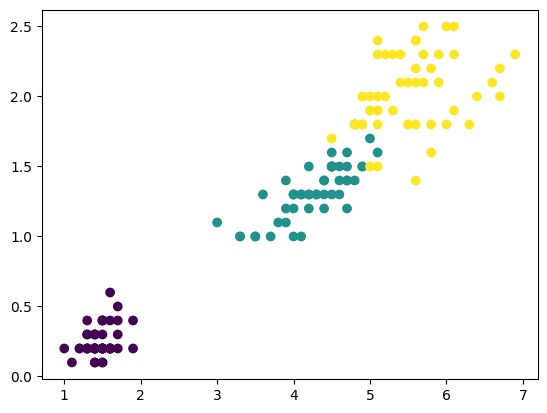

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt 

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
X_train.shape

(112, 2)

In [4]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

### Let's build our first neural network. We will use sklearn's MLPClassifier

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

In [7]:
model = MLPClassifier(hidden_layer_sizes=(100,100),activation="relu",
                      max_iter=1000,random_state=1,verbose=1)
model.fit(X_train_scaled, y_train)

y_pred=model.predict(X_test_scaled)
print(model.score(X_test_scaled, y_test))

Iteration 1, loss = 1.22897473
Iteration 2, loss = 1.17946500
Iteration 3, loss = 1.13225208
Iteration 4, loss = 1.08798588
Iteration 5, loss = 1.04608248
Iteration 6, loss = 1.00658002
Iteration 7, loss = 0.96930321
Iteration 8, loss = 0.93406316
Iteration 9, loss = 0.90028484
Iteration 10, loss = 0.86750427
Iteration 11, loss = 0.83587758
Iteration 12, loss = 0.80565523
Iteration 13, loss = 0.77704118
Iteration 14, loss = 0.74996988
Iteration 15, loss = 0.72432527
Iteration 16, loss = 0.69972983
Iteration 17, loss = 0.67601840
Iteration 18, loss = 0.65329978
Iteration 19, loss = 0.63138212
Iteration 20, loss = 0.61012130
Iteration 21, loss = 0.58965631
Iteration 22, loss = 0.57009024
Iteration 23, loss = 0.55148502
Iteration 24, loss = 0.53393829
Iteration 25, loss = 0.51720953
Iteration 26, loss = 0.50121006
Iteration 27, loss = 0.48580969
Iteration 28, loss = 0.47095097
Iteration 29, loss = 0.45658959
Iteration 30, loss = 0.44272659
Iteration 31, loss = 0.42934290
Iteration 32, los

/home/savannahgramze/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


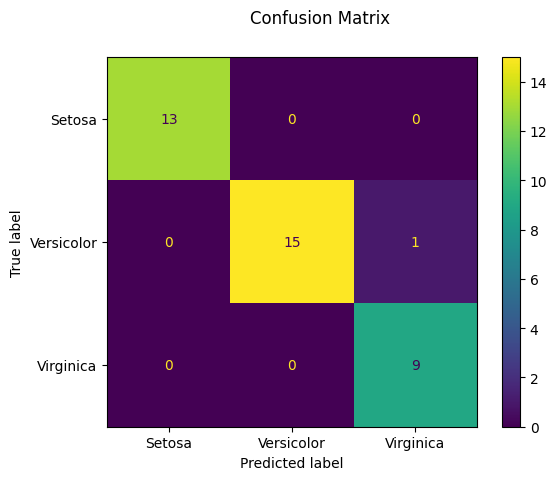

In [8]:
from sklearn.metrics import plot_confusion_matrix

fig=plot_confusion_matrix(model, X_test_scaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [9]:
model.predict_proba(X_test_scaled)

array([[2.96826712e-05, 5.58582618e-04, 9.99411735e-01],
       [4.67674808e-03, 9.91826979e-01, 3.49627262e-03],
       [9.98464698e-01, 1.37220172e-03, 1.63100174e-04],
       [4.02487097e-05, 1.56964843e-03, 9.98390103e-01],
       [9.98117840e-01, 1.69176535e-03, 1.90394457e-04],
       [2.42419682e-06, 2.62080541e-05, 9.99971368e-01],
       [9.98103316e-01, 1.71108518e-03, 1.85598638e-04],
       [3.21786920e-03, 8.70071557e-01, 1.26710574e-01],
       [3.03947768e-03, 9.12867415e-01, 8.40931074e-02],
       [2.62300726e-03, 9.92711501e-01, 4.66549152e-03],
       [1.93714461e-03, 2.66602509e-01, 7.31460347e-01],
       [2.84983940e-03, 9.39308349e-01, 5.78418115e-02],
       [2.26456361e-03, 9.84891619e-01, 1.28438176e-02],
       [3.04310427e-03, 9.11325677e-01, 8.56312189e-02],
       [2.83396267e-03, 9.41402066e-01, 5.57639709e-02],
       [9.98917721e-01, 9.56609733e-04, 1.25669120e-04],
       [2.84983940e-03, 9.39308349e-01, 5.78418115e-02],
       [2.26653366e-03, 9.92083

In [10]:
print(model.coefs_[0].shape, model.coefs_[1].shape, model.coefs_[2].shape)

(2, 100) (100, 100) (100, 3)


In [11]:
model.coefs_[0]

array([[-1.77035229e-02,  1.79912983e-01, -2.69376812e-01,
        -6.64179892e-02, -4.07818179e-02, -2.73692186e-01,
        -2.20854359e-01, -1.85376873e-02,  4.06766635e-02,
         7.70989385e-02, -5.63063331e-02,  1.21759656e-01,
         1.10468866e-02,  2.66045293e-01, -1.93707553e-01,
         1.68877628e-01, -1.14943524e-03,  6.52204001e-02,
        -2.17006201e-01, -2.24922974e-01,  3.95419546e-02,
         2.01778485e-01, -1.73994834e-01,  1.75892283e-02,
         2.82931605e-01,  2.68454078e-01, -2.61530483e-01,
        -2.39325161e-01, -1.25654863e-01,  2.45026380e-01,
        -2.83244862e-01, -1.94964423e-02,  2.72843463e-01,
         3.43801319e-02,  1.02442323e-01, -1.61383018e-01,
         2.10371745e-01,  2.14032083e-01, -3.51489736e-01,
         1.27694018e-01,  3.46020276e-01,  9.50938604e-02,
        -1.04466381e-01,  3.62653720e-02, -2.11061730e-01,
        -6.93057764e-02,  7.46248874e-02, -1.07171368e-01,
        -8.46621079e-02, -2.40982100e-01, -3.11881004e-0

Text(0, 0.5, 'Training Loss')

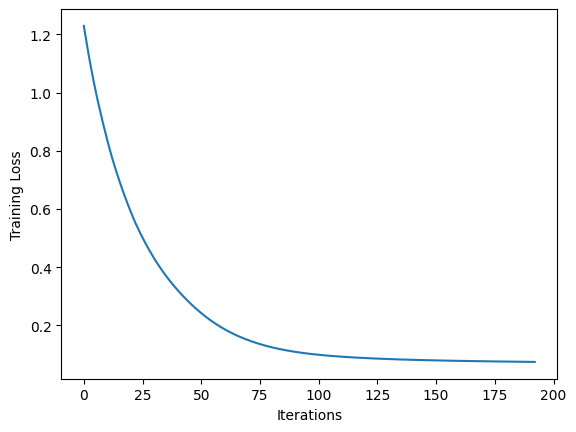

In [12]:
plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')

### Hyperparameter Optimization

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPClassifier())
])

param_grid = {
    'mlp__hidden_layer_sizes': [(300,200,100), (150,100,50), (75,50,25)],
    'mlp__max_iter': [100, 200, 300],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__learning_rate': ['constant','adaptive']
}

grid_search = GridSearchCV(pipe, param_grid, return_train_score=True, cv=5, n_jobs=4, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/home/savannahgramze/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/savannahgramze/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/savannahgramze/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/savannahgramze/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sa

[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=sgd;, score=(train=0.697, test=0.696) total time=   0.6s
[CV 5/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=sgd;, score=(train=0.933, test=0.955) total time=   0.6s
[CV 4/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=adam;, score=(train=0.978, test=0.955) total time=   0.8s
[CV 4/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=sgd;, score=(train=0.911, test=0.909) total time=   1.7s
[CV 3/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=adam;, score=(train=0.978, test=1.000) total time=   2.2s
[CV 3/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=300, mlp__solver=sgd;, score=(train=0.933, tes

/home/savannahgramze/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('mlp', MLPClassifier())]),
             n_jobs=4,
             param_grid={'mlp__hidden_layer_sizes': [(300, 200, 100),
                                                     (150, 100, 50),
                                                     (75, 50, 25)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__max_iter': [100, 200, 300],
                         'mlp__solver': ['sgd', 'adam']},
             return_train_score=True, verbose=3)

In [14]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'mlp__hidden_layer_sizes': (300, 200, 100), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 100, 'mlp__solver': 'adam'}
Best model: Pipeline(steps=[('sc', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(300, 200, 100),
                               max_iter=100))])
Test score: 0.97


### Save and load a model.

In [15]:
import pickle

# save
with open('iris_model.pkl','wb') as f:
    pickle.dump(grid_search.best_estimator_,f)

# load
with open('iris_model.pkl', 'rb') as f:
    model_best = pickle.load(f)

In [16]:
model_best.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('mlp', MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=100))],
 'verbose': False,
 'sc': StandardScaler(),
 'mlp': MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=100),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__batch_size': 'auto',
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': False,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (300, 200, 100),
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.001,
 'mlp__max_fun': 15000,
 'mlp__max_iter': 100,
 'mlp__momentum': 0.9,
 'mlp__n_iter_no_change': 10,
 'mlp__nesterovs_momentum': True,
 'mlp__power_t': 0.5,
 'mlp__random_state': None,
 'mlp__shuffle': True,
 'mlp__solver': 'adam',
 'mlp__tol': 0.0001,
 'mlp__validation_fraction': 0.1,
 'mlp__verbose': False,
 'mlp__warm_start': False}

In [17]:
model_best.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [18]:
model_best.score(X_test, y_test)

0.9736842105263158

### Instead of sklearn's MLP classifier, we can use Keras implemented onto Tensorflow. You will have to choose a Tensorflow kernel on hipergator.


Keras: https://keras.io/

Tensorflow: https://www.tensorflow.org/

In [19]:
import tensorflow.keras as keras

# Initialize a model.
model = keras.models.Sequential()

# Add the input layer and specifying its shape.
model.add(keras.layers.Input(shape=X_train.shape[1]))

# Add the first hidden layer with 100 neurons and the ReLU activation function.
model.add(keras.layers.Dense(100, activation='relu'))

# Add the second hidden layer with 100 neurons and the ReLU activation function.
model.add(keras.layers.Dense(100, activation='relu'))

# Add the output layer
# softmax normalizes the output to a probability distribution
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

2023-03-06 13:57:57.980789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 13:57:58.598023: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-06 13:57:58.704094: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 13:57:58.704121: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

### We can use the following syntax instead.

In [20]:
model = keras.models.Sequential()

# This line combines the input layer and the first hidden layer.
model.add(keras.layers.Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

### We can also use the following syntax.

In [21]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])

### Let's check the "architecture" of our neural network. Note that the input layer does not show up here.

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10,703
Trainable params: 10,703
Non-trainable params: 0
_________________________________________________________________


### We can also have a look at the weights.

In [23]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 100) dtype=float32, numpy=
 array([[-9.38683003e-02, -1.48200154e-01,  1.29447490e-01,
         -1.25279650e-01, -6.61318451e-02,  1.84584677e-01,
         -7.02054501e-02, -4.27938551e-02, -2.07585722e-01,
         -2.28820458e-01, -2.34042346e-01, -2.37295121e-01,
          1.99314505e-01, -3.44458818e-02, -1.20602362e-01,
         -1.26777142e-01, -1.73792392e-02, -2.12786511e-01,
          1.16093457e-02, -9.65409130e-02, -1.64484024e-01,
          3.60326171e-02,  6.91179931e-02,  2.33525664e-01,
          3.47269773e-02, -1.34706289e-01,  1.92171484e-01,
         -2.52233148e-02,  2.34430760e-01, -3.83151323e-02,
         -7.47144222e-05,  7.88361728e-02, -7.89563954e-02,
         -4.00895476e-02, -2.38167688e-01, -4.18828726e-02,
         -1.46179974e-01, -1.33431703e-01, -6.72359616e-02,
         -9.33996290e-02, -5.65074533e-02,  2.04266608e-03,
         -1.75825059e-01, -1.33834511e-01, -1.79010302e-01,
         -1.66546226e-01,  3.0

[CV 4/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=sgd;, score=(train=0.844, test=0.818) total time=   0.7s
[CV 3/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=adam;, score=(train=0.956, test=1.000) total time=   0.7s
[CV 2/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=sgd;, score=(train=0.944, test=0.913) total time=   1.5s
[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=adam;, score=(train=0.978, test=0.957) total time=   1.7s
[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=300, mlp__solver=sgd;, score=(train=0.955, test=0.957) total time=   2.6s
[CV 5/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=300, mlp__solver=sgd;, score=(train=0.933, tes

### Now, we need to "compile" the model before we fit to the data.

Some useful links

Loss functions: https://keras.io/api/losses/ 

Optimizers: https://keras.io/api/optimizers/ 

Metrics: https://keras.io/api/metrics/

In [25]:
model.compile(loss='sparse_categorical_crossentropy', # categorical, not regressor
              optimizer='adam',
              metrics='accuracy')

### We are ready to train the neural network. Let's start training.

In [26]:
# history will record the loss, accuracy, etc. 
# validation_split will split the training dataset into training + validation datasets. 
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 100ms/step - loss: 1.0682 - accuracy: 0.4607 - val_loss: 1.0248 - val_accuracy: 0.5217
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.9582 - accuracy: 0.7416 - val_loss: 0.9591 - val_accuracy: 0.5217
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.8646 - accuracy: 0.7416 - val_loss: 0.9048 - val_accuracy: 0.5217
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.7827 - accuracy: 0.7416 - val_loss: 0.8588 - val_accuracy: 0.5217
Epoch 5/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.7144 - accuracy: 0.7416 - val_loss: 0.8204 - val_accuracy: 0.5217
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6546 - accuracy: 0.7416 - val_loss: 0.7886 - val_accuracy: 0.5217
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.6064 - accuracy: 0.7416 - val_loss: 0.7624 - val_accuracy: 0.5217
Epoch 8/1000

### Note that in each epoch, there are 3 mini batches.

In [27]:
X_train_scaled.shape

(112, 2)

In [30]:
(X_train_scaled.shape[0]*0.8)/32

2.8000000000000003

In [28]:
X_train_scaled.shape[0]/32

3.5

### Let's evlauate the model using the test dataset.

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3145626485347748
Test accuracy: 0.9736841917037964


### Let's check how loss and validation loss evolved over epoch.

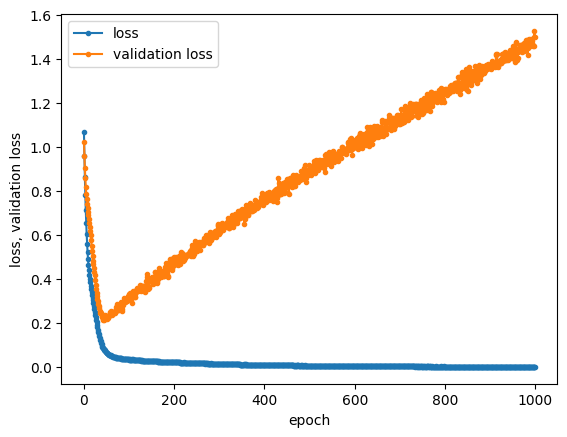

In [33]:
plt.plot(history.epoch, history.history['loss'],'.-', label='loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()
# blue shows training error
# orange is validation error, like test error
# decreases initially, then increases
# model evolves to do a great job for training data, but then starts overfitting and doesn't do well with validation data

### Let's check how accuracy and validation accuracy evolved over epoch.

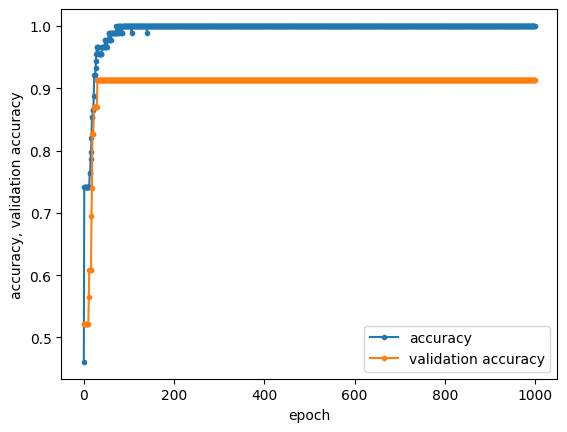

In [35]:
plt.plot(history.epoch, history.history['accuracy'],'.-', label='accuracy') # 100% because it memorizes the answer
plt.plot(history.epoch, history.history['val_accuracy'],'.-', label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')
plt.legend()

### Early stopping

In [44]:
# The default monitor is "val_loss"
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

In [45]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [46]:
history = model.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb]) # additional argument, callbacks from above


Epoch 1/1000
3/3 [==============================] - 1s 124ms/step - loss: 1.0467 - accuracy: 0.3933 - val_loss: 1.0978 - val_accuracy: 0.2609
Epoch 2/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.9690 - accuracy: 0.3933 - val_loss: 1.0987 - val_accuracy: 0.2609
Epoch 3/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.9637 - accuracy: 0.3933 - val_loss: 1.0900 - val_accuracy: 0.2609
Epoch 4/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.9527 - accuracy: 0.3933 - val_loss: 1.0323 - val_accuracy: 0.2609
Epoch 5/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.9371 - accuracy: 0.3933 - val_loss: 0.9914 - val_accuracy: 0.2609
Epoch 6/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.9258 - accuracy: 0.3933 - val_loss: 0.9669 - val_accuracy: 0.2609
Epoch 7/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.9141 - accuracy: 0.3933 - val_loss: 0.9660 - val_accuracy: 0.2609
Epoch 8/1000

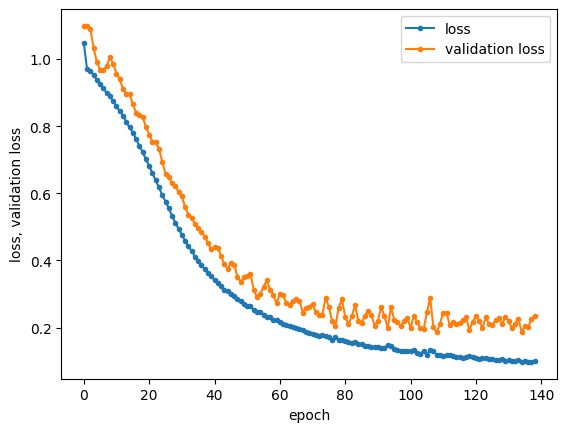

In [47]:
plt.plot(history.epoch, history.history['loss'],'.-', label='loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()

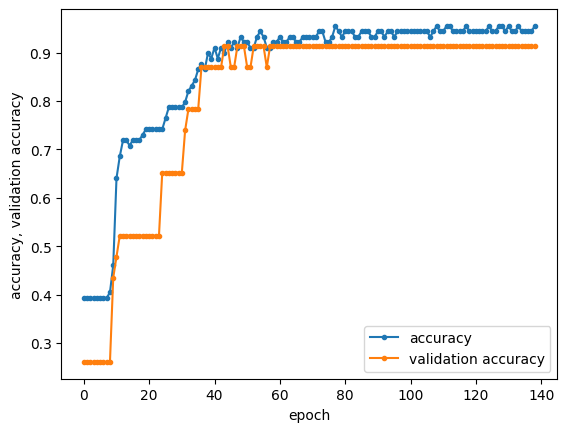

In [48]:
plt.plot(history.epoch, history.history['accuracy'],'.-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'],'.-', label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')
plt.legend()

### Let's check out weights and biases.

In [49]:
model.layers

In [50]:
hidden1 = model.layers[0]

In [51]:
hidden1.name

'dense_12'

### Let's put weights and biases of the first hidden layer in w1 and b1.

In [52]:
w1, b1 = hidden1.get_weights()

In [53]:
w1

array([[-0.08070242,  0.2829244 ,  0.2671129 ,  0.22881949, -0.12818241,
         0.10972091, -0.10962763,  0.17238112,  0.16043538, -0.24153699,
         0.02228129,  0.16877311, -0.1207815 , -0.21373218,  0.20874414,
        -0.2347489 ,  0.28042048,  0.10951961, -0.21543536,  0.05987866,
        -0.01847763,  0.16664933, -0.10407153,  0.21727945,  0.08185732,
        -0.10029376,  0.19946261,  0.08310812,  0.30684254, -0.2011384 ,
         0.18234293,  0.10130524, -0.145239  , -0.11416905,  0.11853788,
         0.12896246, -0.10005644,  0.05334701, -0.04486457, -0.1108637 ,
        -0.03354549,  0.15215541, -0.21862116, -0.16417795,  0.06848192,
         0.17175616,  0.19841018,  0.02337206,  0.19941552, -0.08117282,
         0.10677236, -0.16196579, -0.2041249 , -0.19291621,  0.22329038,
        -0.14771627, -0.04673688, -0.00247306,  0.18301639, -0.2123563 ,
         0.0528128 ,  0.08478857,  0.05772389,  0.05906318, -0.20197943,
         0.1243364 , -0.1688228 ,  0.24025679, -0.0

In [54]:
w1.shape

(2, 100)

In [55]:
b1

array([ 0.        , -0.1132752 ,  0.13899863, -0.16883773,  0.        ,
       -0.1945435 ,  0.        ,  0.108596  ,  0.24947755,  0.        ,
       -0.19576824, -0.21914725,  0.        ,  0.        ,  0.16763228,
        0.        ,  0.20886005,  0.12328573,  0.        , -0.21213664,
        0.        ,  0.26441625,  0.        ,  0.2215169 , -0.20035434,
        0.        , -0.1919535 ,  0.24166755, -0.1290218 ,  0.        ,
       -0.19411466, -0.24365312,  0.        ,  0.        ,  0.25705674,
       -0.22257844,  0.        ,  0.27349675,  0.        ,  0.        ,
        0.        ,  0.21356201,  0.        ,  0.        , -0.10578734,
       -0.20510745,  0.24185494, -0.18341959,  0.19420929,  0.        ,
       -0.19862714,  0.        ,  0.        ,  0.        ,  0.17337184,
        0.        ,  0.        ,  0.        ,  0.19245058,  0.        ,
       -0.1153266 , -0.13490094,  0.2572251 , -0.21545538,  0.        ,
        0.254238  ,  0.        , -0.12508108,  0.        ,  0.05

In [56]:
b1.shape

(100,)

### We can save the model and then load it as needed.

In [ ]:
model.save("iris_model_final.h5")

In [ ]:
model_new = keras.models.load_model("iris_model_final.h5")

In [ ]:
model_new.summary()

### Let's try a larger dataset = the MNIST dataset.

In [ ]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### Scale the images to 0 - 1.

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

### For now, let's use 10% of the data.

In [ ]:
X_train = X_train[::10]
X_test = X_test[::10]

y_train = y_train[::10]
y_test = y_test[::10]

In [ ]:
X_train.shape

In [ ]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### TODO: Make your own neural network and see how they perform. 

### Try Stochastic Gradient Descent with a learning rate of 1.0e-3.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

### Try also Adam optimizer with a learning rate of 1.0e-3.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

### TODO: Evaluate the model using the test dataset.

### TODO: Check how loss and accuracy have evolved over the training.